In [207]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Check GPU usage on M1 MAC / Window

In [208]:
# Window version
# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# M1 MAC version
DEVICE = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')

print(DEVICE)

mps:0


In [209]:
# MNIST Data Load
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root="your path", train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root="your path", train=False, download=True, transform=transform)

In [210]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/euntaeklee/Git_Project/Pytorch/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /Users/euntaeklee/Git_Project/Pytorch/data
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [211]:
train_DS.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [212]:
train_DS.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [213]:
train_DS.data.shape

torch.Size([60000, 28, 28])

In [214]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

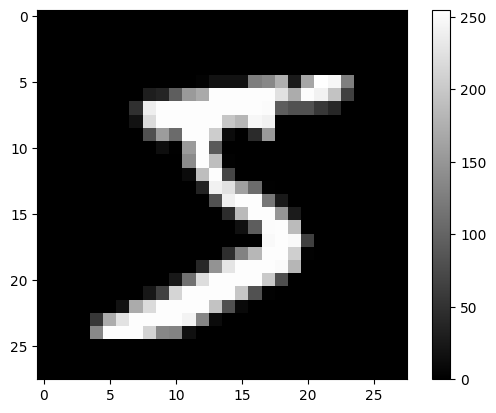

In [215]:
plt.imshow(train_DS.data[0], cmap='gray')
plt.colorbar()

In [216]:
print(train_DS.targets[-1])
print(train_DS.targets.shape)

tensor(8)
torch.Size([60000])


## DataLoader

In [217]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [218]:
print(len(train_DL.dataset))

60000


<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.Size([32])
tensor(3)
torch.uint8
torch.float32


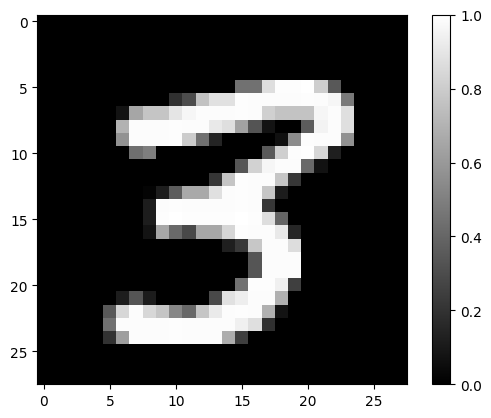

In [219]:
x_batch, y_batch = next(iter(train_DL)) # One data group per batch
print(type(train_DS.data))
print(type(x_batch.data))
print(x_batch.shape)
print(y_batch.shape)
plt.imshow(x_batch[0].squeeze(), cmap='gray')  # if you want to get image, you should use .squeeze() function
plt.colorbar()
print(y_batch[0])

print(train_DL.dataset.data.dtype)
print(x_batch.dtype)
# Role of ToTenser
# 1. change to tensor form
# 2. change to "numberxchannelxrowxcolumn" form
# 3. switch to 0 to 1 (int -> float)

## Make Model

In [220]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Linear(100, 10))

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)

        return x

In [221]:
# flatten
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
flat_images = torch.flatten(x_batch)
print(x_batch.shape[0]*x_batch.shape[1]*x_batch.shape[2]*x_batch.shape[-1])
print(flat_images.shape)
flat_images2 = torch.flatten(x_batch, start_dim=1)
print(flat_images2.shape)

torch.Size([32, 1, 28, 28])
25088
torch.Size([25088])
torch.Size([32, 784])


In [222]:
model = MLP()
print(model)
print(model(x_batch).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


## Model Train

In [223]:
len(train_DL.dataset)

60000

In [224]:
from torch import nn
from torch import optim

lr = 1e-3
epoch = 5
criterion = nn.CrossEntropyLoss()

def Train(model, train_DL, criterion, optimizer):
    loss_history = []
    NoT = len(train_DL.dataset)
    
    model.train()
    for it in range(epoch):
        rloss = 0
        for x_batch, y_batch in train_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # loss
            loss = criterion(y_hat, y_batch)
            # update
            optimizer.zero_grad() # prevent stack of gradient
            loss.backward() # BPP
            optimizer.step() # Weight update
            # loss accumulation
            loss_b = loss.item() * x_batch.shape[0]
            rloss += loss_b
        # print loss
        loss_e = rloss/NoT
        loss_history += [loss_e]
        print(f'Epoch: {it+1}, train loss: {round(loss_e, 3)}')
        print("-"*30)
        
    return loss_history

## Let's check Cross Entropy (Why didn't I put softmax on the model?)

In [225]:
# various way to calculate cross entropy
import torch.nn.functional as F

y_hat = torch.randn(3,5) # Assume there are three types of data
print(y_hat) # The sum of rows before passing through the softmax layer is not 1
y_batch = torch.randint(5, (3,))
print(y_batch)

# method 1
loss = F.cross_entropy(y_hat, y_batch) # It already has a built-in softmax.
print(loss)

# method 2
criterion = nn.CrossEntropyLoss() # It already has a built-in softmax.
print(criterion(y_hat, y_batch))

# method 3
y_hat_soft = F.softmax(y_hat, dim=1)
print(y_hat_soft)
loss = 0
for i, val in enumerate(y_hat_soft):
    print(i, val)
    loss += -torch.log(val[y_batch[i]])
print(loss/3)

tensor([[-1.4473,  0.1783, -1.1942, -0.6450,  0.6024],
        [ 0.4469,  0.8590,  2.0383,  0.1017,  0.3473],
        [ 0.1339,  1.9371,  1.0125, -0.3458,  0.3622]])
tensor([4, 3, 2])
tensor(1.6339)
tensor(1.6339)
tensor([[0.0576, 0.2926, 0.0742, 0.1285, 0.4472],
        [0.1107, 0.1672, 0.5436, 0.0784, 0.1002],
        [0.0881, 0.5346, 0.2121, 0.0545, 0.1107]])
0 tensor([0.0576, 0.2926, 0.0742, 0.1285, 0.4472])
1 tensor([0.1107, 0.1672, 0.5436, 0.0784, 0.1002])
2 tensor([0.0881, 0.5346, 0.2121, 0.0545, 0.1107])
tensor(1.6339)


Epoch: 1, train loss: 0.308
------------------------------
Epoch: 2, train loss: 0.142
------------------------------
Epoch: 3, train loss: 0.097
------------------------------
Epoch: 4, train loss: 0.073
------------------------------
Epoch: 5, train loss: 0.058
------------------------------


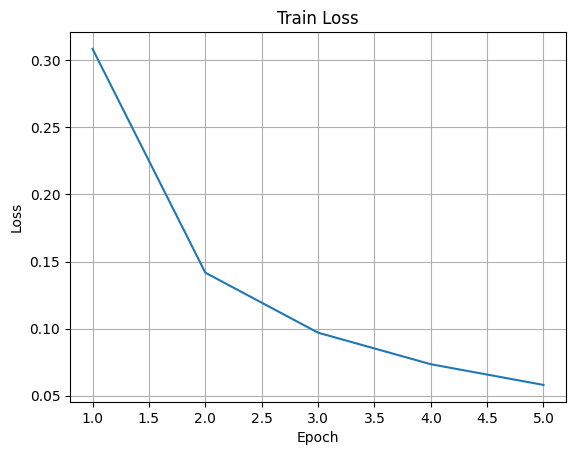

In [226]:
model = MLP().to(DEVICE) # you should upload x_batch, y_batch, model into GPU device!
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_history = Train(model, train_DL, criterion, optimizer)

plt.plot(range(1, epoch+1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.grid()

## Model Save & Load Model

In [228]:
save_model_path = "your path/result/MLP_MNIST.pt"
torch.save(model.state_dict(), save_model_path)

In [230]:
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path))
# You need map_location to recall what you learned with the GPU to the current device.

<All keys matched successfully>

## Model test 

In [285]:
def Test(model, test_DL):
    model.eval()
    with torch.no_grad():
        rcorrect = 0
        for x_batch, y_batch in test_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # accuracy accumulation
            pred = y_hat.argmax(dim=1)
            corrects_b = torch.sum(pred == y_batch).item()
            rcorrect += corrects_b
        accuracy_e = rcorrect/len(test_DL.dataset) * 100
    print(f"Test accuracy: {rcorrect}/{len(test_DL.dataset)} ({round(accuracy_e,2)} %)")

In [286]:
Test(load_model, test_DL)

Test accuracy: 9760/10000 (97.6 %)


In [293]:
def Test_plot(model, test_DL):
    model.eval()
    with torch.no_grad():
        x_batch, y_batch = next(iter(test_DL))
        x_batch = x_batch.to(DEVICE)
        y_hat = model(x_batch)
        pred = y_hat.argmax(dim=1)
    x_batch = x_batch.to('cpu')

    plt.figure(figsize=(8,4))
    for idx in range(6):
        plt.subplot(2, 3, idx+1, xticks=[], yticks=[])
        plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap='gray')
        pred_class = test_DL.dataset.classes[pred[idx]]
        true_class = test_DL.dataset.classes[y_batch[idx]]
        plt.title(f"{pred_class} ({true_class})", color = 'g' if pred_class==true_class else "r")

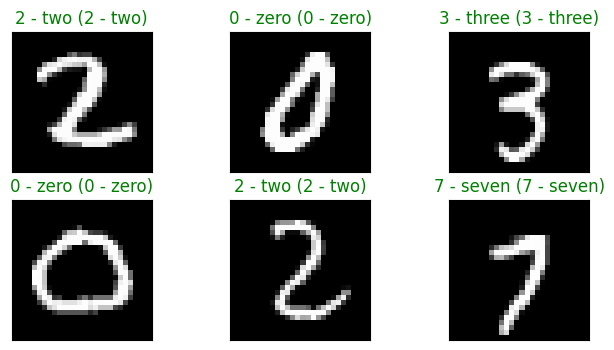

In [294]:
Test_plot(load_model, test_DL)

In [297]:
# get trainable parameters
def count_params(model):
    num = sum([p.numel() for p in model.parameters() if p.requires_grad])
    return num

In [298]:
print(count_params(model))

79510
